In [141]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json

import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [144]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [146]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [147]:
df['cut']=df['cut'].map({'Ideal':5,'Premium':4 ,'Very Good':3,'Good':2 ,'Fair':1})
df['color']=df['color'].map({'D':7 , 'E':6 , 'F':5 , 'G':4 ,'H':3 ,'I':2 ,'J':1 })
df['clarity']=df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

<Axes: >

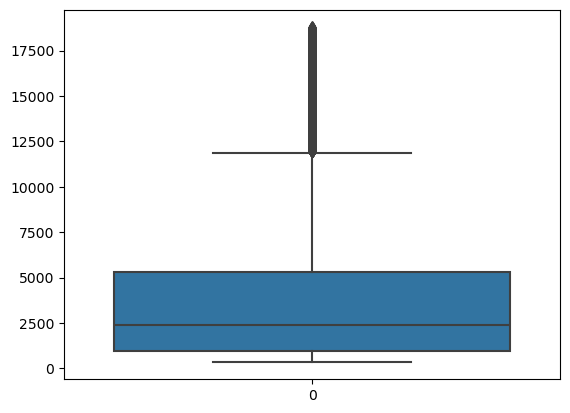

In [148]:
sns.boxplot(df['price'])

In [149]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

11885.625

In [150]:
df['price'] = np.where(df['price'] > upper_limit, upper_limit, df['price'])

<Axes: >

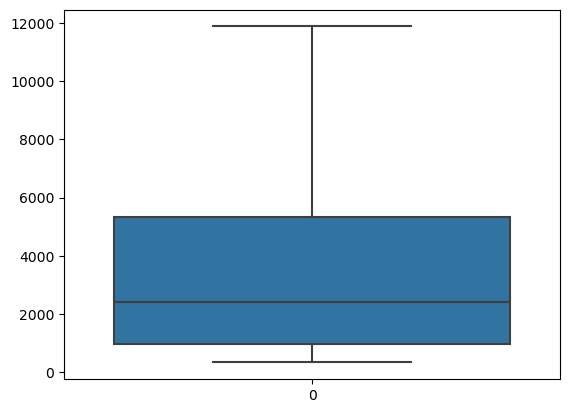

In [151]:
sns.boxplot(df['price'])

<Axes: >

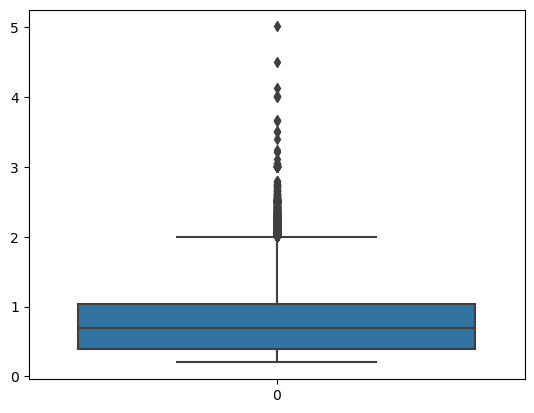

In [152]:
sns.boxplot(df['carat'])

In [153]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

2.0

In [154]:
df['carat'] = np.where(df['carat'] > upper_limit, upper_limit, df['carat'])

<Axes: >

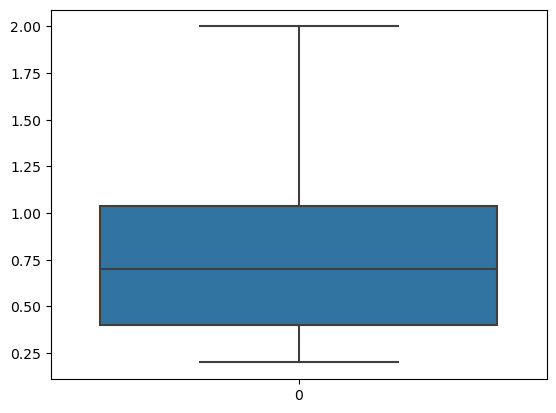

In [155]:
sns.boxplot(df['carat'])

<Axes: >

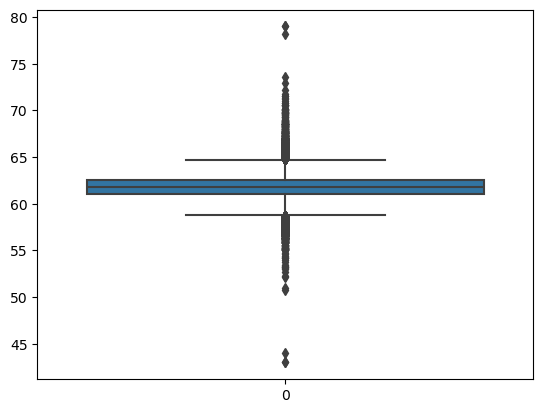

In [156]:
sns.boxplot(df['depth'])

In [157]:
q1 = df['depth'].quantile(0.25)
q3 = df['depth'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

64.75

In [158]:
df['depth'] = np.where(df['depth'] > upper_limit, upper_limit, df['depth'])

<Axes: >

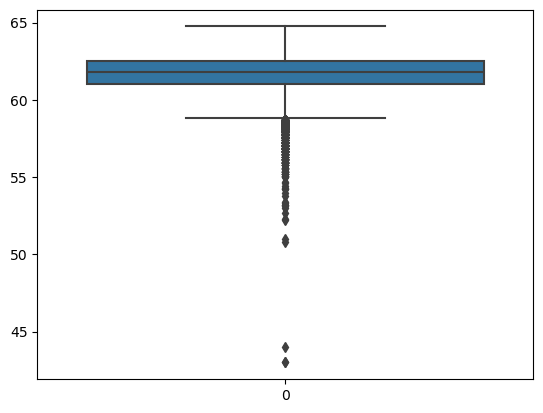

In [159]:
sns.boxplot(df['depth'])

In [160]:
q1 = df['depth'].quantile(0.25)
q3 = df['depth'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
lower_limit


58.75

In [161]:
df['depth'] = np.where(df['depth'] < lower_limit, lower_limit, df['depth'])

<Axes: >

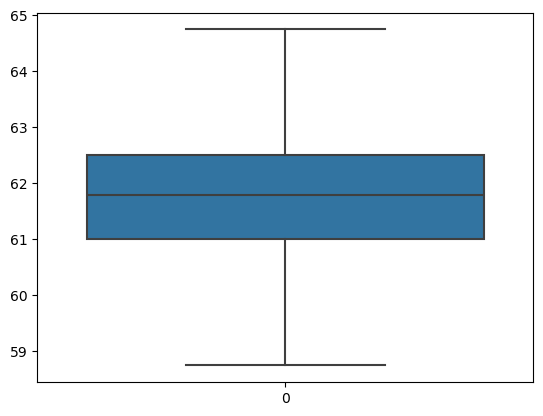

In [162]:
sns.boxplot(df['depth'])

<Axes: >

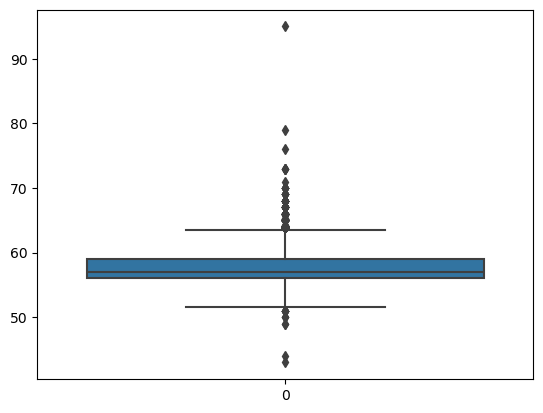

In [163]:
sns.boxplot(df['table'])

In [164]:
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

63.5

In [165]:
df['table'] = np.where(df['table'] > upper_limit, upper_limit, df['table'])

In [166]:
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
lower_limit


51.5

In [167]:
df['table'] = np.where(df['table'] < lower_limit, lower_limit, df['table'])

<Axes: >

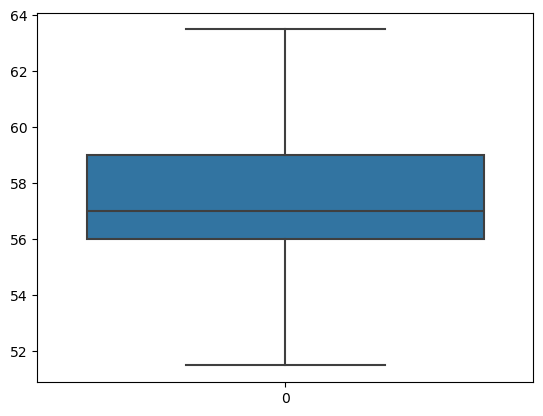

In [168]:
sns.boxplot(df['table'])

In [169]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.50,55.0,326.0,3.95,3.98,2.43
1,2,0.21,4,6,3,59.80,61.0,326.0,3.89,3.84,2.31
2,3,0.23,2,6,5,58.75,63.5,327.0,4.05,4.07,2.31
3,4,0.29,4,2,4,62.40,58.0,334.0,4.20,4.23,2.63
4,5,0.31,2,1,2,63.30,58.0,335.0,4.34,4.35,2.75


<Axes: >

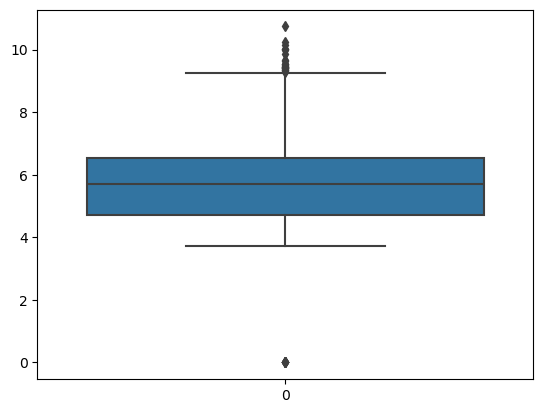

In [170]:
sns.boxplot(df['x'])

In [171]:
df = df.drop(df[df["x"]==0].index)

<Axes: >

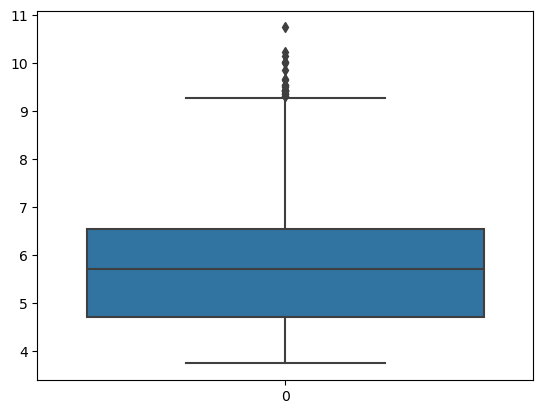

In [172]:
sns.boxplot(df['x'])

In [173]:
q1 = df['x'].quantile(0.25)
q3 = df['x'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

9.285

In [174]:
df['x'] = np.where(df['x'] > upper_limit, upper_limit, df['x'])

<Axes: >

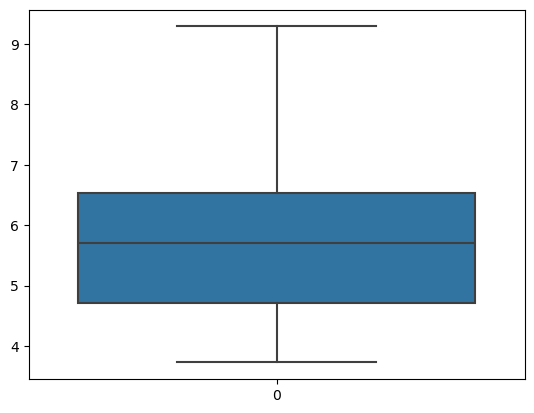

In [175]:
sns.boxplot(df['x'])

In [176]:
df = df.drop(df[df["y"]==0].index)

<Axes: >

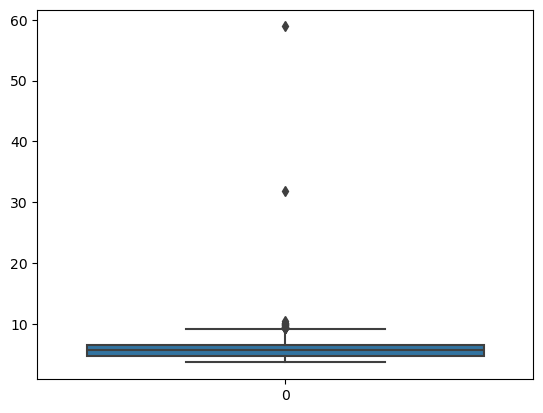

In [177]:
sns.boxplot(df['y'])

In [178]:
q1 = df['y'].quantile(0.25)
q3 = df['y'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

9.27

In [179]:
df['y'] = np.where(df['y'] > upper_limit, upper_limit, df['y'])

<Axes: >

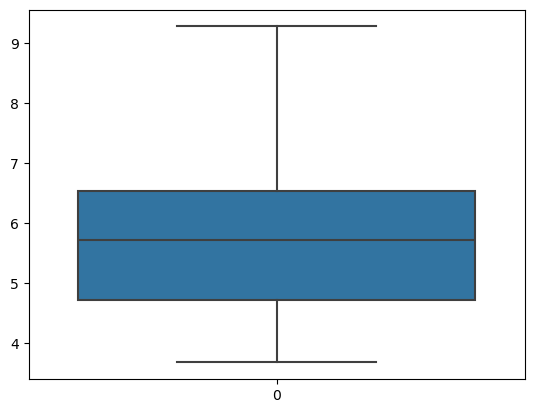

In [180]:
sns.boxplot(df['y'])

<Axes: >

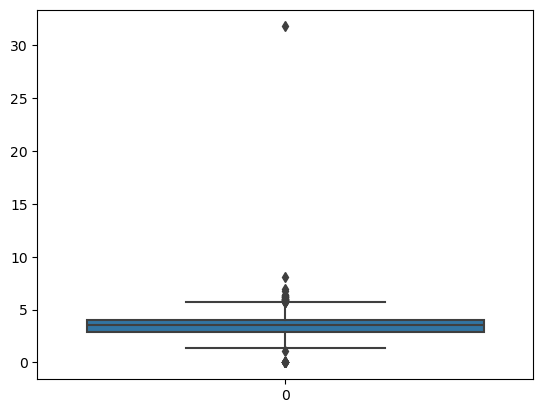

In [181]:
sns.boxplot(df['z'])

In [182]:
df = df.drop(df[df["z"]==0].index)

In [183]:
q1 = df['z'].quantile(0.25)
q3 = df['z'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

5.734999999999999

In [184]:
df['z'] = np.where(df['z'] > upper_limit, upper_limit, df['z'])

<Axes: >

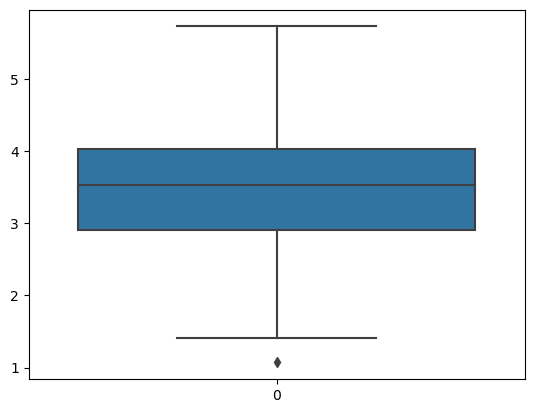

In [185]:
sns.boxplot(df['z'])

In [186]:
q1 = df['z'].quantile(0.25)
q3 = df['z'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
lower_limit


1.2150000000000003

In [187]:
df['z'] = np.where(df['z'] < lower_limit, lower_limit, df['z'])

<Axes: >

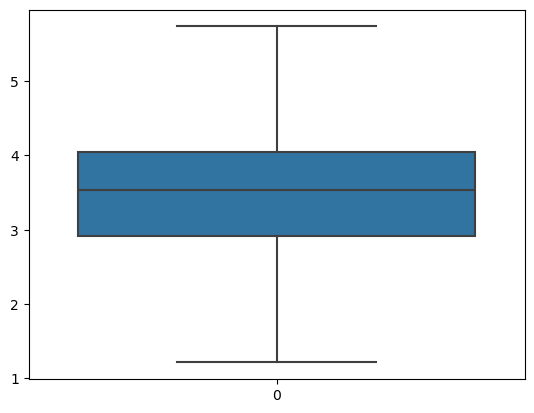

In [188]:
sns.boxplot(df['z'])

<Axes: >

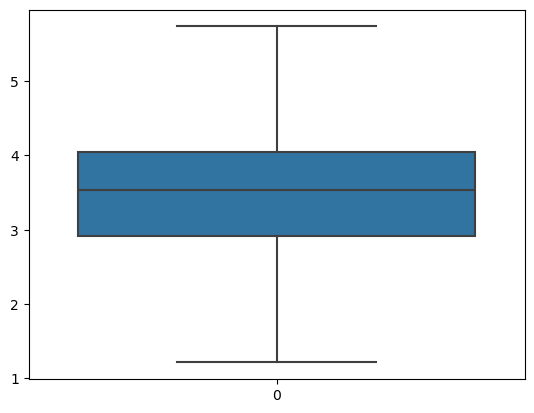

In [189]:
sns.boxplot(df['z'])

In [190]:
df.drop(columns="Unnamed: 0",inplace=True)

In [191]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,4,6,3,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,2,6,5,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,4,2,4,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,2,1,2,63.30,58.0,335.0,4.34,4.35,2.75


### Train Test

In [192]:
x = df.drop('price', axis =1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [193]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [194]:
def evaluation(string, model, ind_var, y_act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
    
    mae = mean_absolute_error(y_act, pred)
    print('MAE :', mae)
    
    r_squared = r2_score(y_act, pred)
    print('R2_Score :', r_squared)
    
    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0] - 1))/(ind_var.shape[0]- ind_var.shape[1]-1))
    print('Adj-R2_Score :', adj_r2)
    
evaluation('Test Data Evaluation', linear_reg, x_test, y_test)
print()

evaluation('Train Data Evaluation', linear_reg, x_train, y_train)

***************Test Data Evaluation***************
MSE: 797390.5281727818
RMSE: 892.9672604148384
MAE : 646.6431916697642
R2_Score : 0.931688575250537
Adj-R2_Score : 0.9316315116880027

**************Train Data Evaluation***************
MSE: 809024.1675139411
RMSE: 899.4577074626361
MAE : 651.5330427661528
R2_Score : 0.9316607848474268
Adj-R2_Score : 0.9316465230810591


In [195]:
x.head(1).T

,0
carat,0.23
cut,5.00
color,6.00
clarity,2.00
depth,61.50
table,55.00
x,3.95
y,3.98
z,2.43


In [196]:
x.head(1).values

array([[ 0.23,  5.  ,  6.  ,  2.  , 61.5 , 55.  ,  3.95,  3.98,  2.43]])

In [197]:
test_array = x.head(1).values
test_array

array([[ 0.23,  5.  ,  6.  ,  2.  , 61.5 , 55.  ,  3.95,  3.98,  2.43]])

In [198]:
linear_reg.predict(test_array)

array([-810.08001611])

In [199]:
test_arr_new = [[ 1.25  ,  1.23,  5.2  ,  6.5  ,  2.  , 61.5 , 55.2  ,  3.95,  3.98,
         2.43]]

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming df is your DataFrame and 'target_column' is your target variable
X = df.drop(columns=['price'])
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_array_scaled = scaler.transform(test_array)

# Train and evaluate different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} R^2 score: {r2_score(y_test, y_pred)}")

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best parameters for Ridge:", grid.best_params_)
print("Best Ridge R^2 score on test set:", grid.score(X_test_scaled, y_test))

# Use the best model for final prediction
best_model = grid.best_estimator_
prediction = best_model.predict(test_array_scaled)
print("Prediction for test array:", prediction)


Linear Regression R^2 score: 0.9346982294287114
Ridge Regression R^2 score: 0.9347024540570747
Lasso Regression R^2 score: 0.9345688609079614
Random Forest R^2 score: 0.9889351360805929
Best parameters for Ridge: {'alpha': 1}
Best Ridge R^2 score on test set: 0.9347024540570747
Prediction for test array: [-810.28777924]


In [202]:
X.head(1).values

array([[ 0.23,  5.  ,  6.  ,  2.  , 61.5 , 55.  ,  3.95,  3.98,  2.43]])

In [203]:
test_array = X.head(2).values
test_array

array([[ 0.23,  5.  ,  6.  ,  2.  , 61.5 , 55.  ,  3.95,  3.98,  2.43],
       [ 0.21,  4.  ,  6.  ,  3.  , 59.8 , 61.  ,  3.89,  3.84,  2.31]])

In [204]:
best_model.predict(test_array)

array([14085.10324735, 14238.92505953])

In [205]:
project_data ={"cut":{'Ideal':5,'Premium':4 ,'Very Good':3,'Good':2 ,'Fair':1},"color":{'D':7 , 'E':6 , 'F':5 , 'G':4 ,'H':3 ,'I':2 ,'J':1} ,"clarity":{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}}
project_data

{'cut': {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1},
 'color': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1},
 'clarity': {'I1': 1,
  'SI2': 2,
  'SI1': 3,
  'VS2': 4,
  'VS1': 5,
  'VVS2': 6,
  'VVS1': 7,
  'IF': 8}}

In [206]:
cut = 'Fair'
project_data['cut'][cut]


1

In [207]:
clarity = 'I1'
project_data['clarity'][clarity]

1

In [208]:
column_names = x_train.columns
column_names

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [209]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [210]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,4,6,3,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,2,6,5,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,4,2,4,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,2,1,2,63.30,58.0,335.0,4.34,4.35,2.75


In [211]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [212]:
with open('Linear_Model.pkl', 'wb') as f:
    pickle.dump(linear_reg, f)